1.- Cierta compañía aérea ha requerido de sus servicios profesionales para llevar a
cabo un estudio relacionado con la cantidad de pasajeros que llegan al país en vuelos 
internacionales, dicho estudio tiene relación con la enfermedad de COVID-19. 
De acuerdo a la información que maneja la compañía, la cantidad de pasajeros
que llegan en vuelos internacionales se comporta aproximadamente normal con
una media de 120 pasajeros y una varianza de 25.

a. Asumiendo que cada día llegan a Santiago 16 vuelos internacionales,
determine la probabilidad de que durante el año (52 semanas) la cantidad
total de pasajeros sea de al menos de 699500.

b. De acuerdo con registros históricos se sabe que aproximadamente un 7%
de los pasajeros son niños. Considerando un potencial de 400 pasajeros que
llegarían en los próximos días, determine la probabilidad que menos de un
5% sean niños.

In [51]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# media pasajeros por día
media_pasajeros_dia_mu = 120
# varianza pasajeros
varianza = 25
# desviacion típica pasajeros
desviacion_tipica_sigma = 5


vuelos_diarios = 16
semanas_anual = 52
dias_semana = 7
total_pasajeros_esperados_anual_X = 699500
sigma = 0.10

vuelos_anuales = vuelos_diarios*semanas_anual*dias_semana

total_pasajeros_diario_esperado_X = total_pasajeros_esperados_anual_X / \
    semanas_anual / dias_semana / vuelos_diarios
print("Pasajeros por día esperado en base al total anual :",total_pasajeros_diario_esperado_X)

# normaliza pasajeros diarios esperados
Z = (total_pasajeros_diario_esperado_X - media_pasajeros_dia_mu) / desviacion_tipica_sigma
alpha = round(norm.cdf(Z), 4)
print(
    f"\nLuego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z={Z:.4f} ")
# se solicta que a lo menos, es decir, que sea mayor o igual a 699500 pasajeros, por lo que se debe considerar cola derecha
alpha = 1 - alpha
print(
    f"Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a {total_pasajeros_esperados_anual_X} es del {alpha*100:.2f}%")


Pasajeros por día esperado en base al total anual : 120.10645604395604

Luego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z=0.0213 
Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a 699500 es del 49.15%


In [53]:
# alternativa de cálculo en base a 1 año
vuelos_diarios = 16
semanas_anual = 52
dias_semana = 7
total_pasajeros_esperados_anual_X = 699500

total_vuelos_anual = vuelos_diarios * dias_semana* semanas_anual 
print("total vuelos anual: ",total_vuelos_anual)

# calculando 
mu_pasajeros_anual = media_pasajeros_dia_mu * total_vuelos_anual
print("media pasajeros anual:", mu_pasajeros_anual)

# calculando desviacion típica anual
desviacion_tipica_anual_esperada = sigma *  total_vuelos_anual
print("desviación típica anual:",desviacion_tipica_anual_esperada)

# tipificando X en su valor anual
Z = ( total_pasajeros_esperados_anual_X - mu_pasajeros_anual ) / desviacion_tipica_anual_esperada

total vuelos anual:  5824
media pasajeros anual: 698880
desviación típica anual: 582.4


In [55]:
alpha = round(norm.cdf(Z), 4)
print(
    f"Luego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z={Z:.4f} ")
# se solicta que a lo menos, es decir, que sea mayor o igual a 699500 pasajeros, por lo que se debe considerar cola derecha
alpha = 1 - alpha
print(f"Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a {total_pasajeros_esperados_anual_X} es del {alpha*100:.2f}%")


Luego de tipificar la variable X y consultada la tabla distribucion standard N(1,0) se obtiene que Z=1.0646 
Por lo que la probabilidad de que el total de pasajeros durante 1 años sea mayor o igual a 699500 es del 14.35%


b. De acuerdo con registros históricos se sabe que aproximadamente un 7%
de los pasajeros son niños. Considerando un potencial de 400 pasajeros que
llegarían en los próximos días, determine la probabilidad que menos de un
5% sean niños.

In [72]:

n_pasajeros = 400 #Pasajeros en próximos días
p_aprox = 0.07 # Probabilidad histórica de niños

# Calcular la media y varianza

media_niños_por_vuelo = 0.07 * 400 # Total 28 niños
print(f"Media de niños por vuelo: {media_niños_por_vuelo:.2f}")

varianza_niños_por_vuelo = (0.07 * 0.93 * 400) # Total 26 niños
print(f"Varianza de niños por vuelo: {varianza_niños_por_vuelo:.2f}")

# Calculo de la probabilidad de que al menos el  5% de los pasajeros sean niños
probability = norm.cdf((0.05 * 400 - media_niños_por_vuelo) / np.sqrt(varianza_niños_por_vuelo))
print(f"La probabilidad de que al menos el 5% de los pasajeros sean niños es: {probability * 100:.2f}%")


Media de niños por vuelo: 28.00
Varianza de niños por vuelo: 26.04
La probabilidad de que al menos el 5% de los pasajeros sean niños es: 5.85%


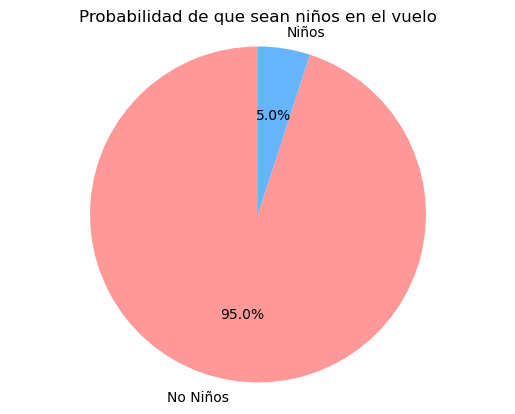

In [73]:
import matplotlib.pyplot as plt

# Datos
total_pasajeros = 400
porcentaje_ninos = 0.05
cantidad_ninos = total_pasajeros * porcentaje_ninos
probabilidad_ninos = cantidad_ninos / total_pasajeros

# Graficar
labels = ['No Niños', 'Niños']
sizes = [1 - probabilidad_ninos, probabilidad_ninos]
colors = ['#ff9999', '#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Aspecto
ax1.axis('equal')
plt.title('Probabilidad de que sean niños en el vuelo')

# Mostrar gráfico
plt.show()


2. - Una empresa que se dedica a hacer encuestas se queja de que un agente
realiza en promedio 53 encuestas por semana. Se ha introducido una forma más
moderna de realizar las encuestas y la empresa quiere evaluar su efectividad. Los
números de encuestas realizadas en una semana por una muestra aleatoria de
agentes son:
En el nivel de significancia 0.05, puede concluirse que la cantidad media de entrevistas
realizadas por los agentes es superior a 53 por semana? Evalúe el valor p.



In [71]:
from scipy.stats import t
import numpy as np

# Definir la muestra de datos
data = [53, 57, 50, 55, 58, 54, 60, 52, 59, 62, 60, 60, 51, 59]

# Definir la hipótesis nula
media_hipotesis = 53 # Encuestas a la semana
nivel_de_significancia = 0.05
n = 14

# Calcular la estadística de prueba t y el valor p
t_stat, p_value = ttest_1samp(data, media_hipotesis)

# Imprimir los resultados
print("Estadística de prueba t: ", t_stat)
print("Valor p: ", p_value)
print("Con el valor de p, se puede decir que se rechaza la Hipotesis nula")


Estadística de prueba t:  3.3086807674740464
Valor p:  0.005652526562219216
Con el valor de p, se puede decir que se rechaza la Hipotesis nula


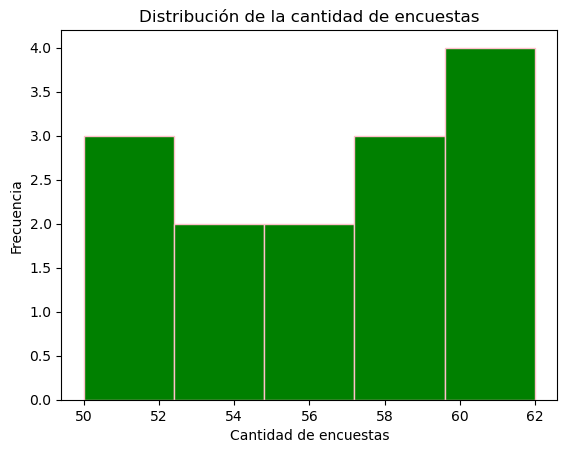

In [70]:
import matplotlib.pyplot as plt

# Definir la muestra de datos
data = [53, 57, 50, 55, 58, 54, 60, 52, 59, 62, 60, 60, 51, 59]

# Crear el histograma
plt.hist(data, bins = 'auto', color = 'green', edgecolor = 'pink')

# Configurar el título y las etiquetas de los ejes
plt.title("Distribución de la cantidad de encuestas")
plt.xlabel("Cantidad de encuestas")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()
